Default AdaBoost Accuracy (n_estimators=10): 0.8182

Best Accuracy: 0.8340 achieved with n_estimators=73


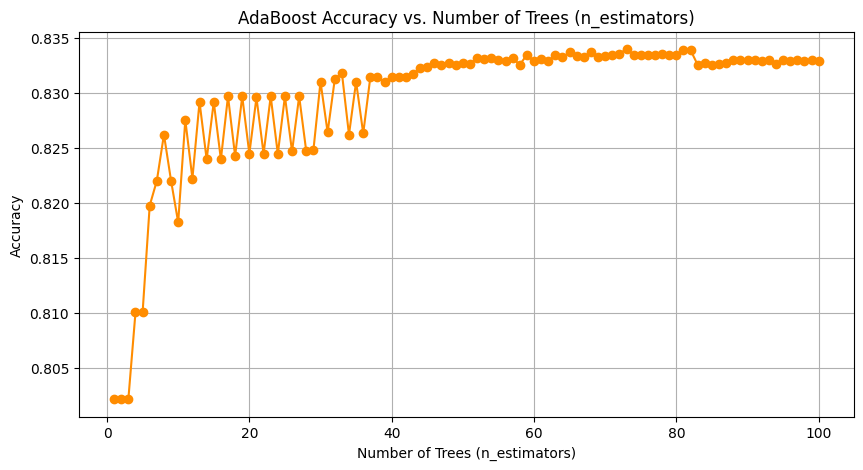

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("income (1).csv")

# Encode categorical features if necessary
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# Assume the target column is named 'income' (you may need to adjust this)
X = df_encoded.drop(columns=['income_level'])
y = df_encoded['income_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train with default n_estimators=10
ab_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ab_default.fit(X_train, y_train)
y_pred_default = ab_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"Default AdaBoost Accuracy (n_estimators=10): {default_accuracy:.4f}")

# 2. Fine-tune the number of trees
best_accuracy = 0
best_n = 0
accuracies = []

for n in range(1, 101):
    ab = AdaBoostClassifier(n_estimators=n, random_state=42)
    ab.fit(X_train, y_train)
    y_pred = ab.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_n = n

print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with n_estimators={best_n}")

# Plot accuracy vs n_estimators
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), accuracies, marker='o', color='darkorange')
plt.title('AdaBoost Accuracy vs. Number of Trees (n_estimators)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
